## Что входит в работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Цель задачи
Задача классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("telecom_churn.csv")
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Первичная обработка данных:

1. Выбросим колонку State.

2. Колонки International plan и Voice mail plan закодируем следующим образом: Yes заменим на 1, а No на 0.

3. Переведем целевую переменную (Churn) в числа: True в 1, а False в 0.

In [4]:
# удалим колонку State
df = df.drop(['State'], axis=1)

# Колонки International plan и Voice mail plan закодируем следующим образом: Yes заменим на 1, а No на 0
df = pd.get_dummies(df, dtype=float)

# Переведем целевую переменную (Churn) в числа: True в 1, а False в 0
df['Churn'] = df['Churn'].astype(int)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   Number vmail messages   3333 non-null   int64  
 3   Total day minutes       3333 non-null   float64
 4   Total day calls         3333 non-null   int64  
 5   Total day charge        3333 non-null   float64
 6   Total eve minutes       3333 non-null   float64
 7   Total eve calls         3333 non-null   int64  
 8   Total eve charge        3333 non-null   float64
 9   Total night minutes     3333 non-null   float64
 10  Total night calls       3333 non-null   int64  
 11  Total night charge      3333 non-null   float64
 12  Total intl minutes      3333 non-null   float64
 13  Total intl calls        3333 non-null   int64  
 14  Total intl charge       3333 non-null   

Выведем на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [6]:
df.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,0,1.0,0.0,0.0,1.0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,0,1.0,0.0,0.0,1.0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,0,1.0,0.0,1.0,0.0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,0,0.0,1.0,1.0,0.0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,0,0.0,1.0,1.0,0.0


Создадим матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [7]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

Проверим баланс классов. Является ли выборка сбалансированной?

In [8]:
y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

***выборка не является сбалансированной***

Разобьем данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируем признаки при помощи StandardScaler, обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [10]:
scaler = StandardScaler()

scaler.fit(X_train.values)

X_train_std = scaler.transform(X_train.values)
X_test_std = scaler.transform(X_test.values)

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведем их снова к pd.DataFrame.

In [11]:
X_train[X_train.columns.to_list()] = X_train_std
X_test[X_test.columns.to_list()] = X_test_std

In [12]:
X_train

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
2016,-0.511937,1.740454,-0.585483,0.410716,0.873749,0.410877,1.167102,-1.646317,1.167733,-0.456961,0.615443,-0.458282,-0.373682,0.226639,-0.379643,1.073319,0.324289,-0.324289,0.612192,-0.612192
1362,-0.939002,1.740454,-0.585483,-0.864713,1.074874,-0.865095,-2.639021,-1.895351,-2.637901,-0.790790,1.075039,-0.789925,-0.122835,-0.997316,-0.127479,1.073319,0.324289,-0.324289,0.612192,-0.612192
2670,0.392435,1.740454,0.289180,0.752053,0.370935,0.752000,-0.984185,0.893834,-0.983076,-0.425542,-1.018675,-0.423373,-0.445353,0.634624,-0.446002,0.323378,0.324289,-0.324289,-1.633475,1.633475
2210,-0.738030,-0.515843,-0.585483,1.814605,0.471498,1.814230,-0.211928,-1.646317,-0.211288,1.070799,-0.814411,1.069020,0.522200,1.042609,0.522840,-1.176504,0.324289,-0.324289,0.612192,-0.612192
1846,0.492921,1.740454,2.548723,-0.038896,0.823467,-0.039276,-0.509404,-1.496896,-0.510269,-0.773117,0.870774,-0.772470,0.450529,-0.181346,0.456481,-0.426563,0.324289,-0.324289,-1.633475,1.633475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.141221,1.740454,-0.585483,1.732023,0.974311,1.732188,-0.046444,-0.899214,-0.046732,-0.782936,-1.937867,-0.781198,-1.520411,-0.589331,-1.521019,-0.426563,0.324289,-0.324289,0.612192,-0.612192
1130,0.543164,-0.515843,-0.585483,-2.659490,-1.942006,-2.659228,-0.397112,-0.550566,-0.396702,1.000106,-2.142132,0.999200,0.880552,-0.997316,0.881179,-0.426563,0.324289,-0.324289,0.612192,-0.612192
1294,-0.863638,-0.682096,-0.585483,-1.696036,-1.238068,-1.696312,1.202563,0.545186,1.202498,-0.315574,1.279303,-0.314280,-0.373682,0.226639,-0.379643,-0.426563,0.324289,-0.324289,0.612192,-0.612192
860,1.723873,-0.515843,-0.585483,-0.015039,0.521779,-0.015527,-0.507434,1.491516,-0.507951,0.548455,-0.405881,0.549737,-0.122835,0.634624,-0.127479,0.323378,0.324289,-0.324289,0.612192,-0.612192


In [13]:
X_test

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
438,0.317071,1.740454,-0.585483,-0.459145,-0.383285,-0.459202,2.554012,0.296151,2.553707,-0.221317,1.177171,-0.222641,1.167234,-0.589331,1.173159,-0.426563,0.324289,-0.324289,0.612192,-0.612192
2674,-0.838516,-0.515843,-0.585483,-1.301479,0.823467,-1.301214,0.323924,1.192675,0.324097,-0.240954,2.096363,-0.240096,0.916387,0.634624,0.920994,-1.176504,0.324289,-0.324289,0.612192,-0.612192
1345,-0.059751,-0.515843,-0.585483,-3.303627,-5.059450,-3.303691,-0.814761,1.491516,-0.813885,-0.659222,-0.610146,-0.659013,-1.233728,-1.405302,-1.229039,1.823260,0.324289,-0.324289,0.612192,-0.612192
1957,1.171201,-0.682096,-0.585483,0.601571,-1.087224,0.601949,0.061908,-0.450952,0.062199,-0.873266,0.666509,-0.872836,-0.015329,-0.997316,-0.021304,-0.426563,0.324289,-0.324289,0.612192,-0.612192
2148,-0.109994,-0.682096,-0.585483,-0.661012,0.069247,-0.661069,0.467737,-1.347475,0.467793,0.530781,-0.456947,0.532282,-0.087000,1.042609,-0.087663,-0.426563,0.324289,-0.324289,0.612192,-0.612192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,-0.461694,-0.515843,-0.585483,-0.818835,0.069247,-0.818677,0.712022,1.093061,0.711150,-1.617509,-0.456947,-1.619032,2.600645,-0.181346,2.606514,-1.176504,0.324289,-0.324289,0.612192,-0.612192
2548,0.417557,-0.682096,0.945176,-0.492178,0.572061,-0.492667,1.228174,0.495379,1.227993,-1.289571,-0.763344,-1.287389,0.593870,1.042609,0.589199,-0.426563,0.324289,-0.324289,-1.633475,1.633475
2916,0.090978,-0.515843,-0.585483,-1.218897,-0.684973,-1.219172,-0.834461,-0.102304,-0.834744,-0.254700,-0.661212,-0.253187,0.092176,0.634624,0.098142,0.323378,0.324289,-0.324289,0.612192,-0.612192
2655,-0.913881,1.740454,-0.585483,0.719021,-1.388912,0.718535,-0.668978,-1.745930,-0.667871,-0.771153,0.972906,-0.772470,-0.087000,0.226639,-0.087663,-0.426563,0.324289,-0.324289,0.612192,-0.612192


Обучим на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [15]:
SVC_model = SVC(kernel='linear', probability=True)
SVC_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

С помощью обученных моделей сделаем предсказание на тестовых данных. Вычислим значение метрики roc-auc на тесте.

In [16]:
pred_logreg = logreg.predict_proba(X_test)[:, 1]
pred_SVC = SVC_model.predict_proba(X_test)[:, 1]

print(f'метрика roc-auc для LogisticRegression: {roc_auc_score(y_test, pred_logreg).round(4)}')
print(f'метрика roc-auc для SVC: {roc_auc_score(y_test, pred_SVC).round(4)}')

метрика roc-auc для LogisticRegression: 0.8283
метрика roc-auc для SVC: 0.7672


Теперь обучим решающее дерево с параметрами по умолчанию на тренировочных данных, сделаем предсказание на тесте и вычислите на тесте roc-auc.

In [17]:
dtclf_model = DecisionTreeClassifier()

dtclf_model.fit(X_train, y_train)

pred_dtclf = dtclf_model.predict_proba(X_test)[:,1]

print(f'метрика roc-auc для DecisionTreeClassifier: {roc_auc_score(y_test, pred_dtclf).round(4)}')

метрика roc-auc для DecisionTreeClassifier: 0.845


Нужно ли масшабировать признаки для обучения решающего дерева? Проверим это, заново разбив данные на тренировочную и тестовую части, и проведем обучение, предсказание и оценку метрики до масштабирования и после.

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
dtclf = DecisionTreeClassifier(random_state=42)

dtclf.fit(Xtrain, ytrain)
pred_dtclf = dtclf.predict_proba(Xtest)[:,1]
print(f'метрика roc-auc для DecisionTreeClassifier до маштабирования: {roc_auc_score(ytest, pred_dtclf).round(4)}')

метрика roc-auc для DecisionTreeClassifier до маштабирования: 0.8362


In [20]:
# проведем маштабирование

scaler = StandardScaler()

scaler.fit(Xtrain.values)

Xtrain[Xtrain.columns.to_list()] = scaler.transform(Xtrain.values)
Xtest[Xtest.columns.to_list()] = scaler.transform(Xtest.values)

In [21]:
dtclf.fit(Xtrain, ytrain)
pred_dtclf_std = dtclf.predict_proba(Xtest)[:,1]
print(f'метрика roc-auc для DecisionTreeClassifier после маштабирования: {roc_auc_score(ytest, pred_dtclf_std).round(4)}')

метрика roc-auc для DecisionTreeClassifier после маштабирования: 0.8362


***Вывод: маштабировнание признаков не влияет на модель***

Теперь наша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберем гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберем max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy.

Для подбора параметров используем GridSearchCV с пятью фолдами и метрикой roc-auc или обычные циклы.

После подбора гиперпараметров обучим модели с найденными гиперпараметрами на тренировочных данных, сделаем предсказания на тесте и оценим их качество (roc_auc).

**Улучшение модели LogisticRegression**

In [23]:
logreg = LogisticRegression(random_state=42)

logreg_grid = {'C': np.arange(0.1, 10, 0.5)}

grid_search_logreg = GridSearchCV(
    estimator=logreg,
    param_grid=logreg_grid,
    cv=5,
    scoring='roc_auc',
    verbose=10,
    n_jobs=-1)

In [24]:
grid_search_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1,
       6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6])},
             scoring='roc_auc', verbose=10)

In [25]:
best_params_logreg = grid_search_logreg.best_params_
C_best_logreg = list(best_params_logreg.values())[0]
print('Лучший параметр "C" модели LogisticRegression:', C_best_logreg)

Лучший параметр "C" модели LogisticRegression: 1.6


In [26]:
logreg_best = LogisticRegression(C=C_best_logreg, random_state=42)
logreg_best.fit(X_train, y_train)
pred_logreg_best = logreg_best.predict_proba(X_test)[:, 1]

print(f'метрика roc_auc LogisticRegression: {roc_auc_score(y_test, pred_logreg_best).round(4)}')
roc_auc_logreg = {'LogisticRegression': roc_auc_score(y_test, pred_logreg_best).round(4)}

метрика roc_auc LogisticRegression: 0.8284


**Улучшение модели SVC**

In [27]:
SVC_model = SVC(random_state=42)

SVC_grid = {'kernel': ['linear'], 'C': np.arange(0.1, 10, 0.5)}
    
grid_search_SVC = GridSearchCV(
    estimator=SVC_model,
    param_grid=SVC_grid,
    cv=5,
    scoring='roc_auc',
    verbose=10,
    n_jobs=-1)

In [28]:
%%time
grid_search_SVC.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


CPU times: total: 672 ms
Wall time: 15 s


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1,
       6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6]),
                         'kernel': ['linear']},
             scoring='roc_auc', verbose=10)

In [29]:
best_params_SVC = grid_search_SVC.best_params_
C_best_SVC = list(best_params_SVC.values())[0]
print('Лучший параметр "C" модели SVC:', C_best_SVC)

Лучший параметр "C" модели SVC: 0.1


In [30]:
SVC_best = SVC(C=C_best_SVC, probability=True, kernel='linear', random_state=42)
SVC_best.fit(X_train, y_train)
pred_SVC_best = SVC_best.predict_proba(X_test)[:, 1]

print(f'метрика roc_auc SVC: {roc_auc_score(y_test, pred_SVC_best).round(4)}')
roc_auc_SVC = {'SVC': roc_auc_score(y_test, pred_SVC_best).round(4)}

метрика roc_auc SVC: 0.6826


**Улучшение модели DecisionTreeClassifier**

In [31]:
dtclf = DecisionTreeClassifier(random_state=42)

dtclf_grid = {'max_depth': np.arange(1, 11, 1), 'criterion': ['gini', 'entropy']}

grid_search_dtclf = GridSearchCV(
    estimator=dtclf,
    param_grid=dtclf_grid,
    cv=5,
    scoring='roc_auc',
    verbose=10,
    n_jobs=-1)

In [32]:
grid_search_dtclf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='roc_auc', verbose=10)

In [33]:
best_params_dtclf = grid_search_dtclf.best_params_
print('Лучшие параметры модели DecisionTreeClassifier:', best_params_dtclf)

Лучшие параметры модели DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 5}


In [34]:
criterion, max_depth = best_params_dtclf.values()

dtclf_best = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=42)
dtclf_best.fit(X_train, y_train)
pred_dtclf_best = dtclf_best.predict_proba(X_test)[:, 1]

print(f'метрика roc_auc DecisionTreeClassifier: {roc_auc_score(y_test, pred_dtclf_best).round(4)}')
roc_auc_dtclf = {'DecisionTreeClassifier': roc_auc_score(y_test, pred_dtclf_best).round(4)}

метрика roc_auc DecisionTreeClassifier: 0.9083


Выберем лучшую модель, которая справилась с решением задачи лучше всего по метрике roc-auc?

In [35]:
scores = {**roc_auc_logreg, **roc_auc_dtclf, **roc_auc_SVC,}
print(f'лучшая метрика roc_auc на модели {max(scores, key=scores.get)} = {max(scores.values())}')

лучшая метрика roc_auc на модели DecisionTreeClassifier = 0.9083


Нарисуем roc-кривую для наилучшей модели.

Text(0, 0.5, 'tpr')

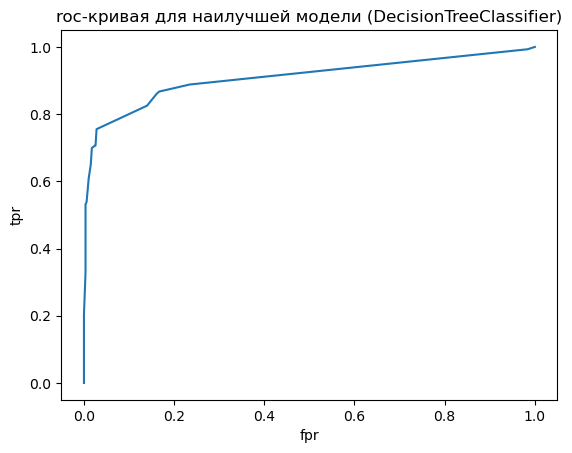

In [36]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# ваш код здесь

fpr, tpr, _ = roc_curve(y_test, pred_dtclf_best)

plt.title('roc-кривая для наилучшей модели (DecisionTreeClassifier)')
plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

Сравним между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислим разность значений roc-auc.)

2. Построим гистограммы важности признаков (для линейных моделей будем брать модуль значений весов) для каждой из этих моделей. Сравним между собой списки из трёх самых важных признаков.

In [37]:
print('\nМетрики roc_auc:')
sorted(scores.items())


Метрики roc_auc:


[('DecisionTreeClassifier', 0.9083),
 ('LogisticRegression', 0.8284),
 ('SVC', 0.6826)]

In [38]:
print(f"Разность лучших метрик roc_auc: {(scores['DecisionTreeClassifier']-scores['LogisticRegression']).round(4)}")

Разность лучших метрик roc_auc: 0.0799


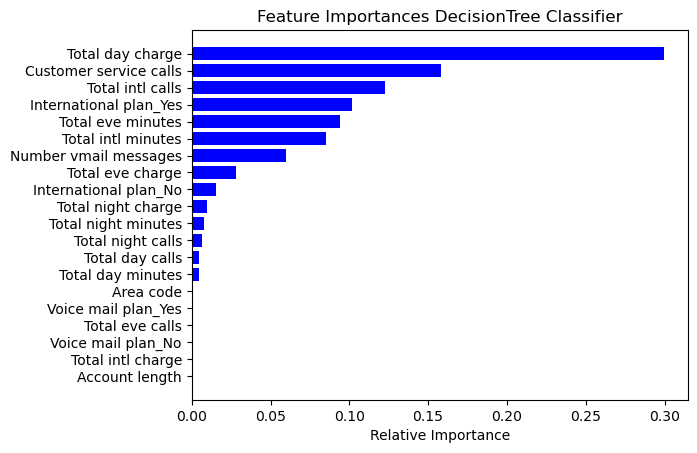

In [39]:
features = X.columns
importances_dtclf = dtclf_best.feature_importances_
indices_dtclf = np.argsort(importances_dtclf)

plt.title('Feature Importances DecisionTree Classifier')
plt.barh(range(len(indices_dtclf)), importances_dtclf[indices_dtclf], color='b', align='center')
plt.yticks(range(len(indices_dtclf)), [features[i] for i in indices_dtclf])
plt.xlabel('Relative Importance')
plt.show()

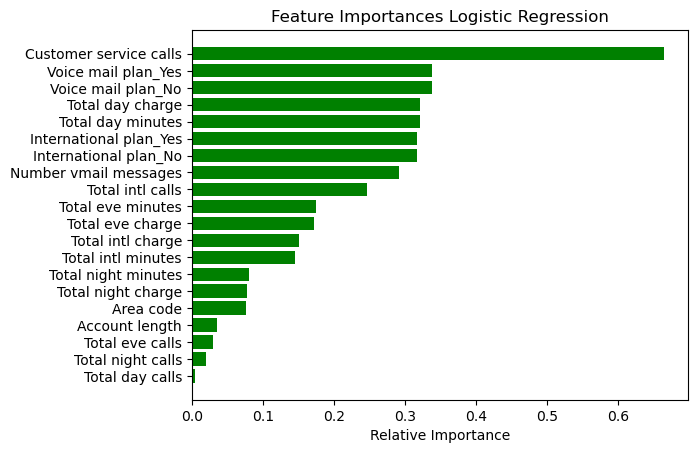

In [40]:
features = X.columns
importances_logreg = abs(logreg_best.coef_[0])
indices_logreg = np.argsort(importances_logreg)

plt.title('Feature Importances Logistic Regression')
plt.barh(range(len(indices_logreg)), importances_logreg[indices_logreg], color='g', align='center')
plt.yticks(range(len(indices_logreg)), [features[i] for i in indices_logreg])
plt.xlabel('Relative Importance')
plt.show()

In [41]:
feature_logreg = tuple(zip(X.columns, importances_logreg.round(4)))
feature_logreg = sorted(feature_logreg, key=lambda x: x[1], reverse=True)
print('Список из трёх самых важных признаков модели Logistic Regression:')
feature_logreg[:3]

Список из трёх самых важных признаков модели Logistic Regression:


[('Customer service calls', 0.6646),
 ('Voice mail plan_No', 0.3386),
 ('Voice mail plan_Yes', 0.3386)]

In [42]:
feature_dtclf = tuple(zip(X.columns, importances_dtclf.round(4)))
feature_dtclf = sorted(feature_dtclf, key=lambda x: x[1], reverse=True)
print('Список из трёх самых важных признаков модели DecisionTree Classifier:')
feature_dtclf[:3]

Список из трёх самых важных признаков модели DecisionTree Classifier:


[('Total day charge', 0.2997),
 ('Customer service calls', 0.1581),
 ('Total intl calls', 0.1229)]

***списки из трёх самых важных признаков двух лучших моделей не совпадают***

***Выводы:***
1. **Данные не сбалансированы, т.к. распределение целевой пременной равно примерно 1:6.**
2. **После подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc модель DecisionTree Classifier.**
3. **Для работы двух наилучших моделей важны разные признаки (но есть основные, которые одинаково важны), т.к. модели используют разный подход (метод).**